In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


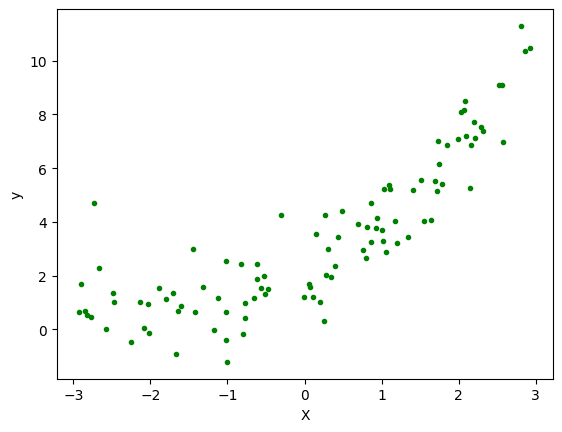

In [15]:
X=6*np.random.rand(100,1)-3
y=0.5*X**2+1.5*X+2+np.random.randn(100,1)
plt.plot(X,y,'g.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [17]:
### Lets try Simple Linear Regression first

In [19]:
from sklearn.linear_model import LinearRegression

model1=LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [20]:
from sklearn.metrics import r2_score

scoreofr2=r2_score(y_test,model1.predict(X_test))
scoreofr2 #0.77


0.7205264253004497

Text(0, 0.5, 'y')

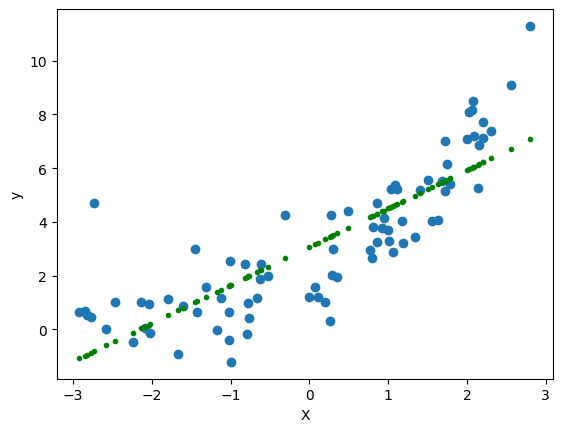

In [21]:
#visualizing the model
plt.plot(X_train,model1.predict(X_train),'g.')
plt.scatter(X_train,y_train)
plt.xlabel('X')
plt.ylabel('y')

####  Try Polynomial Data

In [22]:
#lets try Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=True)

X_train_poly=poly_features.fit_transform(X_train)
X_test_poly=poly_features.transform(X_test)

In [23]:
X_train_poly

array([[ 1.00000000e+00,  1.72037826e+00,  2.95970137e+00],
       [ 1.00000000e+00,  1.19469336e+00,  1.42729223e+00],
       [ 1.00000000e+00, -6.60699665e-01,  4.36524048e-01],
       [ 1.00000000e+00,  4.85385756e-01,  2.35599332e-01],
       [ 1.00000000e+00, -7.70576488e-01,  5.93788124e-01],
       [ 1.00000000e+00,  2.20471222e+00,  4.86075596e+00],
       [ 1.00000000e+00,  8.57913684e-01,  7.36015890e-01],
       [ 1.00000000e+00,  7.64880736e-01,  5.85042540e-01],
       [ 1.00000000e+00,  1.99232802e-01,  3.96937096e-02],
       [ 1.00000000e+00, -6.21627581e-01,  3.86420850e-01],
       [ 1.00000000e+00,  1.50583246e+00,  2.26753141e+00],
       [ 1.00000000e+00,  1.06768460e-01,  1.13995040e-02],
       [ 1.00000000e+00,  1.99637686e+00,  3.98552055e+00],
       [ 1.00000000e+00, -7.73760523e-01,  5.98705347e-01],
       [ 1.00000000e+00,  1.10971258e+00,  1.23146201e+00],
       [ 1.00000000e+00, -2.85058839e+00,  8.12585419e+00],
       [ 1.00000000e+00,  2.06333419e+00

In [24]:
model2=LinearRegression()
model2.fit(X_train_poly,y_train)
y_pred=model2.predict(X_test_poly)
scoreofr2=r2_score(y_test,y_pred)
scoreofr2 #0.97

0.9462767811330056

In [26]:
print(model2.intercept_,model2.coef_)
print(model1.intercept_,model1.coef_)

[1.9286752] [[0.         1.54124176 0.45265338]]
[3.07919099] [[1.42296445]]


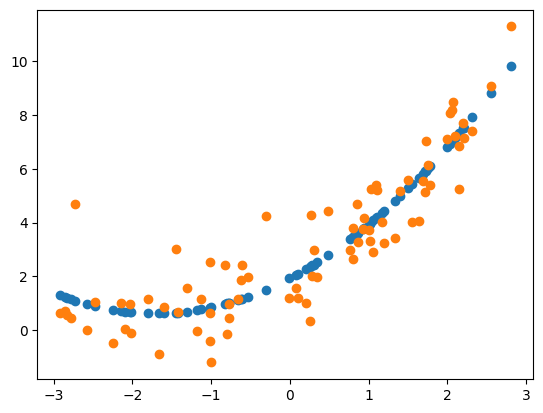

In [28]:
plt.scatter(X_train,model2.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [32]:
## Trying with degree 3
poly_features=PolynomialFeatures(degree=2,include_bias=True)

X_train_poly=poly_features.fit_transform(X_train)
X_test_poly=poly_features.transform(X_test)

model3=LinearRegression()
model3.fit(X_train_poly,y_train)
y_pred=model3.predict(X_test_poly)
scoreofr3=r2_score(y_test,y_pred)
scoreofr3 #0.97


0.9462767811330056

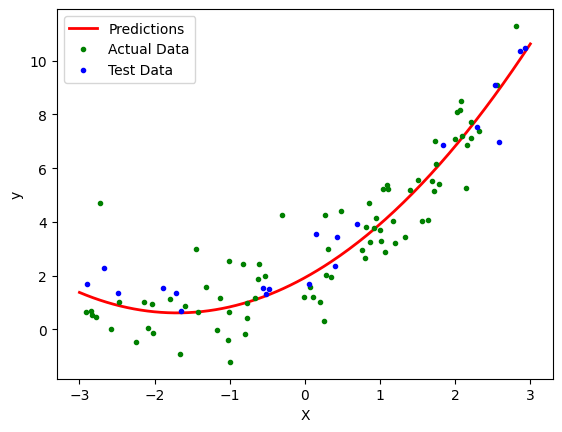

In [33]:
X_new=np.linspace(-3,3,200).reshape(200,1)


X_new_poly=poly_features.transform(X_new)


y_new=model2.predict(X_new_poly)
plt.plot(X_new,y_new,'r-',linewidth=2,label='Predictions')
plt.plot(X_train,y_train,'g.',label='Actual Data')
plt.plot(X_test,y_test,'b.',label='Test Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## PipeLining Concept 



In [34]:
from sklearn.pipeline import Pipeline

def poly_reg(degree):
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    pipeline=Pipeline([('poly_features',poly_features),('lin_reg',lin_reg)])
    return pipeline

In [ ]:
def poly_reg_predict(degree,X_train,y_train,X_test,y_test):
    model=poly_reg(degree)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    
  